In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [87]:
reforestation = pd.read_csv('filter-reforest.csv')
reforestation.head()


,State,Abbreviation,County,Population,Temperature,Precipitation,Palmer-Z,Land-Prices,temp-class
0,Georgia,GA,Appling,18428,68.0,52.38,0.15,3494.0,3
1,Georgia,GA,Atkinson,8183,67.6,50.33,0.04,2839.0,3
2,Georgia,GA,Bacon,11191,68.2,51.25,0.06,3547.0,3
3,Georgia,GA,Baker,2788,68.6,45.67,-0.43,3303.0,3
4,Georgia,GA,Baldwin,43635,65.4,49.83,0.33,0.0,4


In [88]:
reforestation['Land-Prices'].isna().sum()

6

In [89]:
means = reforestation.groupby('State')['Land-Prices'].transform('mean')
reforestation.loc[reforestation['Land-Prices'].isna(), 'Land-Prices'] = means[reforestation['Land-Prices'].isna()]
reforestation.head()

,State,Abbreviation,County,Population,Temperature,Precipitation,Palmer-Z,Land-Prices,temp-class
0,Georgia,GA,Appling,18428,68.0,52.38,0.15,3494.0,3
1,Georgia,GA,Atkinson,8183,67.6,50.33,0.04,2839.0,3
2,Georgia,GA,Bacon,11191,68.2,51.25,0.06,3547.0,3
3,Georgia,GA,Baker,2788,68.6,45.67,-0.43,3303.0,3
4,Georgia,GA,Baldwin,43635,65.4,49.83,0.33,0.0,4


In [90]:
reforestation['Land-Prices'].isna().sum()

0

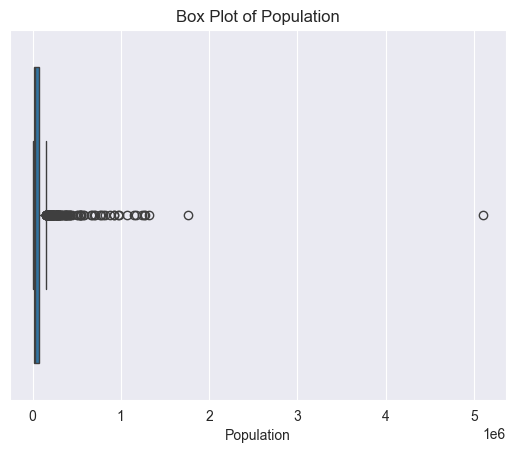

In [91]:
import seaborn as sns
sns.boxplot(x=reforestation['Population'])
plt.title('Box Plot of Population')
plt.show()

[8406.857142857143, 15371.571428571426, 25044.714285714283, 37007.85714285714, 61917.57142857143, 137439.99999999997]


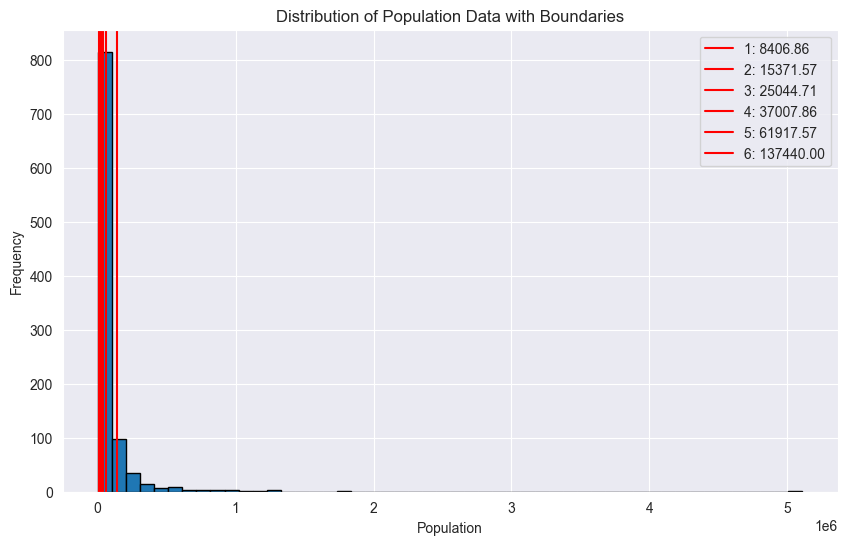

In [92]:
pop_sorted = reforestation['Population'].sort_values().reset_index(drop=True)
quantiles = []
for i in range(1, 7):
    q = pop_sorted.quantile(i/7)
    quantiles.append(q)

print(quantiles)
plt.figure(figsize=(10, 6))
plt.hist(pop_sorted, bins=50, edgecolor='black')
for i, q in enumerate(quantiles):
    plt.axvline(x=q, color='red', label=f'{i+1}: {q:.2f}')

plt.xlabel("Population")
plt.ylabel("Frequency")
plt.title("Distribution of Population Data with Boundaries")
plt.legend()
plt.show()

[45.957142857142856, 50.0, 52.2, 54.92857142857142, 60.785714285714285, 63.9]


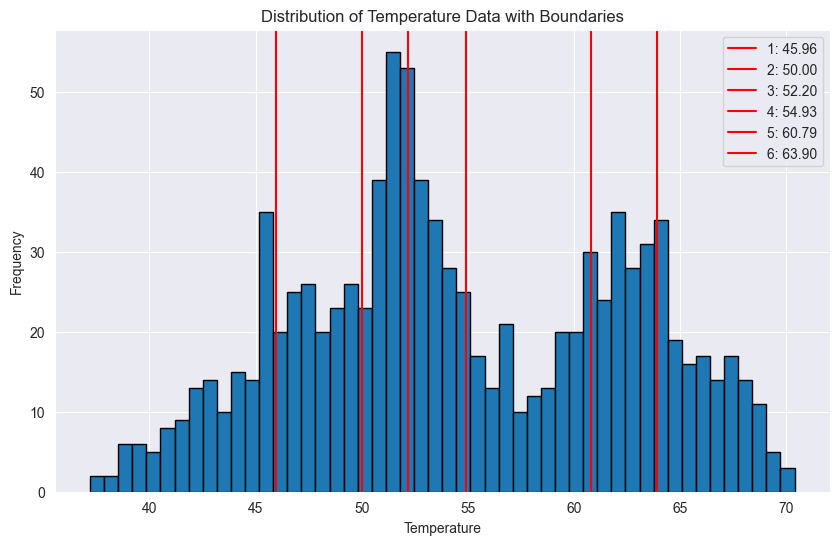

In [93]:
temp_sorted = reforestation['Temperature'].sort_values().reset_index(drop=True)
quantiles = []
for i in range(1, 7):
    q = temp_sorted.quantile(i/7)
    quantiles.append(q)
print(quantiles)

plt.figure(figsize=(10, 6))
plt.hist(temp_sorted, bins=50, edgecolor='black')
for i, q in enumerate(quantiles):
    plt.axvline(x=q, color='red',label=f'{i+1}: {q:.2f}')

plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Distribution of Temperature Data with Boundaries")
plt.legend()
plt.show()

[23.7, 30.96142857142857, 33.64, 38.57285714285714, 45.85142857142857, 50.91714285714284]


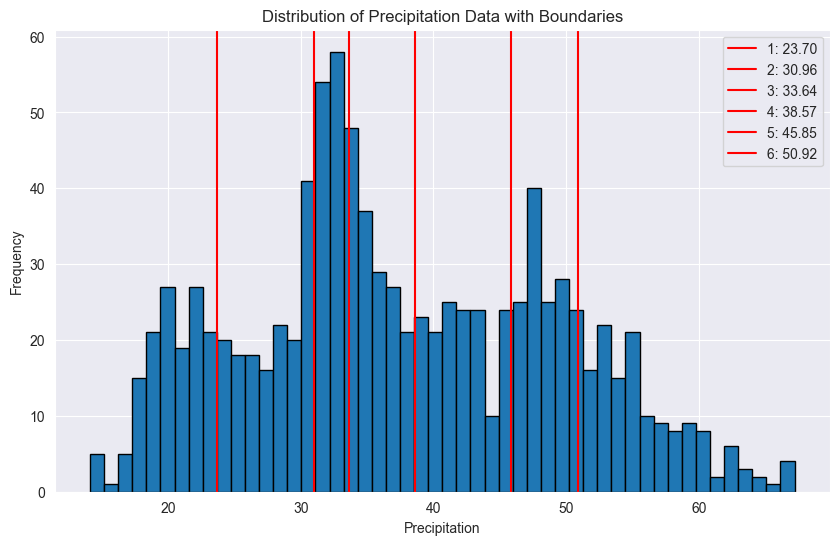

In [94]:
preci_sorted = reforestation['Precipitation'].sort_values().reset_index(drop=True)
quantiles = []
for i in range(1, 7):
    q = preci_sorted.quantile(i/7)
    quantiles.append(q)
print(quantiles)

plt.figure(figsize=(10, 6))
plt.hist(preci_sorted, bins=50,edgecolor='black')

for i, q in enumerate(quantiles):
    plt.axvline(x=q, color='red', label=f'{i+1}: {q:.2f}')
    
plt.xlabel("Precipitation")
plt.ylabel("Frequency")
plt.title("Distribution of Precipitation Data with Boundaries")
plt.legend()
plt.show()

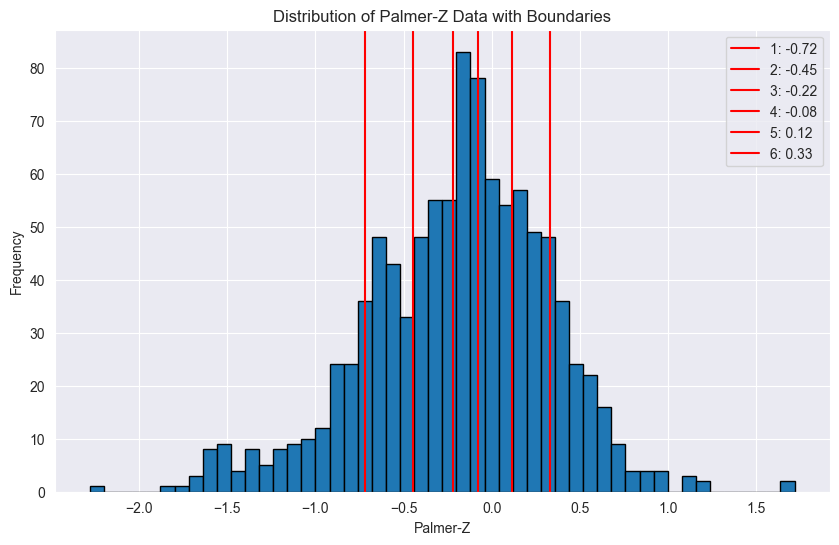

In [95]:
palm_sorted = reforestation['Palmer-Z'].sort_values().reset_index(drop=True)
quantiles = []
for i in range(1, 7):
    q = palm_sorted.quantile(i/7)
    quantiles.append(q)

plt.figure(figsize=(10, 6))
plt.hist(palm_sorted, bins=50,edgecolor='black')
for i, q in enumerate(quantiles):
    plt.axvline(x=q, color='red', label=f'{i+1}: {q:.2f}')


plt.xlabel("Palmer-Z")
plt.ylabel("Frequency")
plt.title("Distribution of Palmer-Z Data with Boundaries")
plt.legend()
plt.show()

[0.0, 3406.857142857142, 4396.571428571428, 5498.428571428571, 6161.857142857143, 7175.42857142857]


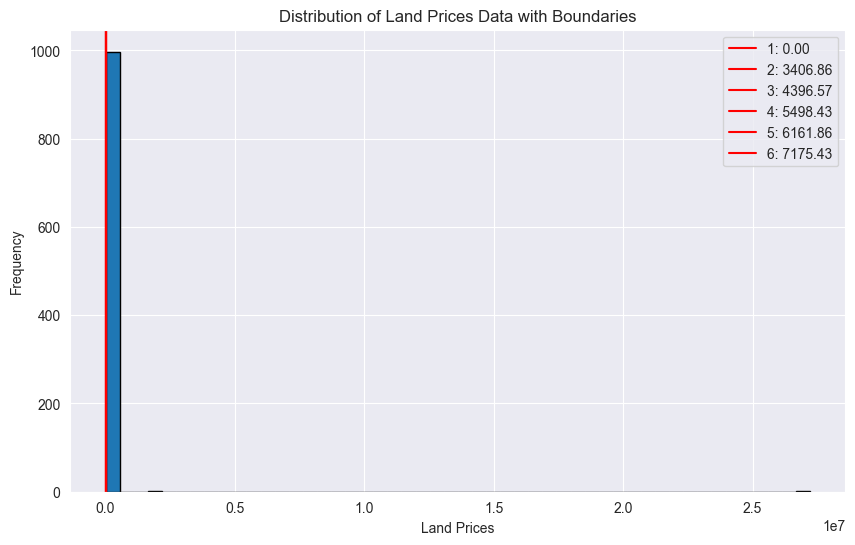

In [96]:
land_sorted = reforestation['Land-Prices'].sort_values().reset_index(drop=True)
quantiles = []
for i in range(1, 7):
    q = land_sorted.quantile(i/7)
    quantiles.append(q)
print(quantiles)
plt.figure(figsize=(10, 6))
plt.hist(land_sorted, bins=50,edgecolor='black')
for i, q in enumerate(quantiles):
    plt.axvline(x=q, color='red', label=f'{i+1}: {q:.2f}')

plt.xlabel("Land Prices")
plt.ylabel("Frequency")
plt.title("Distribution of Land Prices Data with Boundaries")
plt.legend()
plt.show()

Population

In [97]:
bins= [-float('inf'),8406.85, 15371.57, 25044.71, 37007.85, 61917.57, 137439.99,float('inf')]
labels = [7,6,5,4,3,2,1]
reforestation['pop-class'] = pd.cut(reforestation['Population'], bins=bins, labels=labels, right=False)
reforestation.head()

,State,Abbreviation,County,Population,Temperature,Precipitation,Palmer-Z,Land-Prices,temp-class,pop-class
0,Georgia,GA,Appling,18428,68.0,52.38,0.15,3494.0,3,5
1,Georgia,GA,Atkinson,8183,67.6,50.33,0.04,2839.0,3,7
2,Georgia,GA,Bacon,11191,68.2,51.25,0.06,3547.0,3,6
3,Georgia,GA,Baker,2788,68.6,45.67,-0.43,3303.0,3,7
4,Georgia,GA,Baldwin,43635,65.4,49.83,0.33,0.0,4,3


Temperature


In [98]:
bins= [-float('inf'),45.95, 50.0, 52.2, 54.92, 60.78, 63.9,float('inf')]
labels = [1, 2, 3, 4, 7, 6, 5]
reforestation['temp-class'] = pd.cut(reforestation['Temperature'], bins=bins, labels=labels, right=False)
reforestation.head()

,State,Abbreviation,County,Population,Temperature,Precipitation,Palmer-Z,Land-Prices,temp-class,pop-class
0,Georgia,GA,Appling,18428,68.0,52.38,0.15,3494.0,5,5
1,Georgia,GA,Atkinson,8183,67.6,50.33,0.04,2839.0,5,7
2,Georgia,GA,Bacon,11191,68.2,51.25,0.06,3547.0,5,6
3,Georgia,GA,Baker,2788,68.6,45.67,-0.43,3303.0,5,7
4,Georgia,GA,Baldwin,43635,65.4,49.83,0.33,0.0,5,3


Precipiataion

In [99]:
bins = [-float('inf'), 23.7, 30.9, 33.64, 38.57, 45.85, 50.91, float('inf')]
labels = [2, 4, 6, 7, 5, 3, 1]
reforestation['preci-class'] = pd.cut(reforestation['Precipitation'], bins=bins, labels=labels, right=False)
reforestation.head()

,State,Abbreviation,County,Population,Temperature,Precipitation,Palmer-Z,Land-Prices,temp-class,pop-class,preci-class
0,Georgia,GA,Appling,18428,68.0,52.38,0.15,3494.0,5,5,1
1,Georgia,GA,Atkinson,8183,67.6,50.33,0.04,2839.0,5,7,3
2,Georgia,GA,Bacon,11191,68.2,51.25,0.06,3547.0,5,6,1
3,Georgia,GA,Baker,2788,68.6,45.67,-0.43,3303.0,5,7,5
4,Georgia,GA,Baldwin,43635,65.4,49.83,0.33,0.0,5,3,3


Palmer-Z


In [100]:
bins = [-float('inf'),-0.72, -0.44, -0.22, -0.08, 0.11, 0.33,float('inf')]
labels = [1,2,3,4,5,6,7]
reforestation['palm-class'] = pd.cut(reforestation['Palmer-Z'], bins=bins, labels=labels, right=False)
reforestation.head()

,State,Abbreviation,County,Population,Temperature,Precipitation,Palmer-Z,Land-Prices,temp-class,pop-class,preci-class,palm-class
0,Georgia,GA,Appling,18428,68.0,52.38,0.15,3494.0,5,5,1,6
1,Georgia,GA,Atkinson,8183,67.6,50.33,0.04,2839.0,5,7,3,5
2,Georgia,GA,Bacon,11191,68.2,51.25,0.06,3547.0,5,6,1,5
3,Georgia,GA,Baker,2788,68.6,45.67,-0.43,3303.0,5,7,5,3
4,Georgia,GA,Baldwin,43635,65.4,49.83,0.33,0.0,5,3,3,7


Land-prices

In [102]:
bins = [-float('inf'),0.0, 3406.857142857142, 4396.571428571428, 5498.428571428571, 6161.85, 7175.42,float('inf')]
labels = [1,2,3,4,5,6,7]
reforestation['land-class'] = pd.cut(reforestation['Land-Prices'], bins=bins, labels=labels, right=False)
reforestation.head()

,State,Abbreviation,County,Population,Temperature,Precipitation,Palmer-Z,Land-Prices,temp-class,pop-class,preci-class,palm-class,land-class
0,Georgia,GA,Appling,18428,68.0,52.38,0.15,3494.0,5,5,1,6,3
1,Georgia,GA,Atkinson,8183,67.6,50.33,0.04,2839.0,5,7,3,5,2
2,Georgia,GA,Bacon,11191,68.2,51.25,0.06,3547.0,5,6,1,5,3
3,Georgia,GA,Baker,2788,68.6,45.67,-0.43,3303.0,5,7,5,3,2
4,Georgia,GA,Baldwin,43635,65.4,49.83,0.33,0.0,5,3,3,7,2


In [103]:
reforestation.to_csv('filter-reforest.csv', index=False)